# Price Forecasting
This notebook builds a solution using past price data and forecast future 7 days price value.

### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### Reading data and Gaining Insights

In [ ]:


df = pd.read_csv('https://raw.githubusercontent.com/bishram-acharya/hitachi_solution/main/Price%20Forecasting%20data%20upto%20December%2024.csv')
df.head()

,Delivery Day,Hours,Prices\n(EUR/MWh)
0,1/1/2020,H1,26.38
1,1/1/2020,H2,26.50
2,1/1/2020,H3,27.01
3,1/1/2020,H4,27.40
4,1/1/2020,H5,27.99


In [ ]:
# df['Delivery Day']= pd.to_datetime(df['Delivery Day'])
print(df['Delivery Day'].dtype)

object


In [ ]:
df['Delivery Day']=pd.to_datetime(df['Delivery Day'])

In [ ]:
df.drop(df.index[34896:], axis = 0, inplace=True)

In [ ]:
df.rename(columns={"Prices\n(EUR/MWh)": "Prices"}, inplace = True)


([<matplotlib.axis.XTick at 0x79e16a1d68f0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

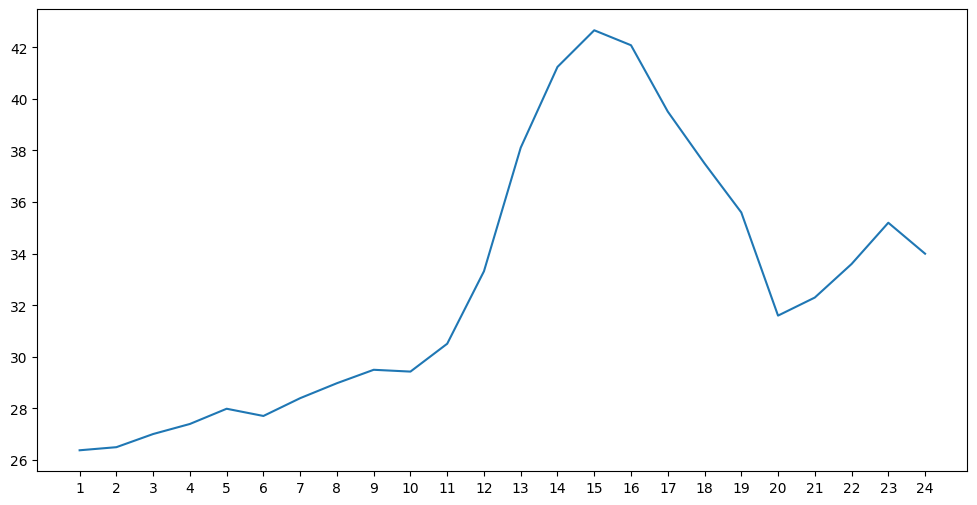

In [ ]:
plt.figure(figsize=(12,6))
xlabel=np.arange(1,25)
plt.plot(xlabel,df['Prices'][0:24])
plt.xticks(xlabel)

In [ ]:
data_copy=df.copy()

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34896 entries, 0 to 34895
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Delivery Day  34896 non-null  datetime64[ns]
 1   Hours         34896 non-null  object        
 2   Prices        34896 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 818.0+ KB


In [ ]:
data_copy.set_index('Delivery Day',inplace=True)
data_copy.head()

,Hours,Prices
Delivery Day,,
2020-01-01,H1,26.38
2020-01-01,H2,26.50
2020-01-01,H3,27.01
2020-01-01,H4,27.40
2020-01-01,H5,27.99


In [ ]:
data_copy['year']=data_copy.index.year
data_copy['month']=data_copy.index.month
data_copy['day']=data_copy.index.day


In [ ]:
data_grp=data_copy.groupby(['year','month','day'])['Prices'].mean().reset_index()

([<matplotlib.axis.XTick at 0x79e16a454610>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

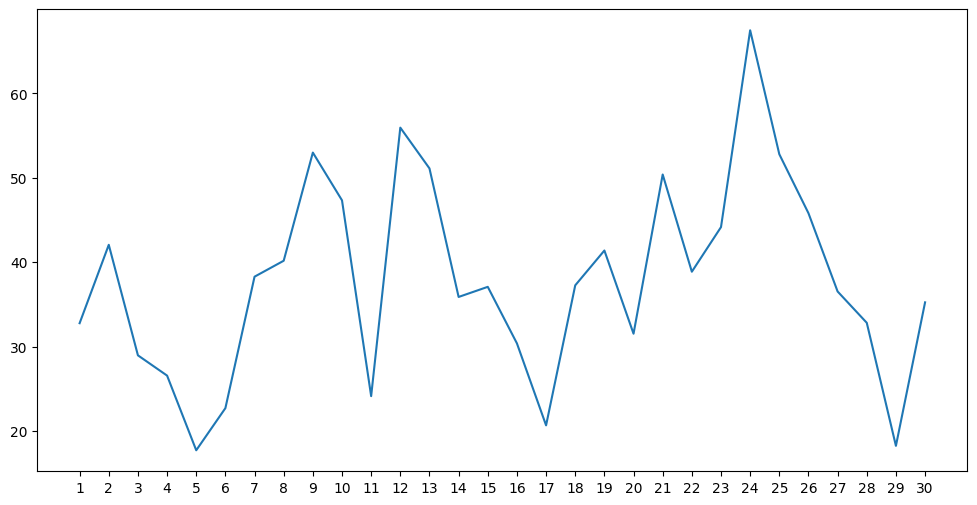

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,31),data_grp['Prices'][:30])
plt.xticks(np.arange(1,31))

In [ ]:
data_month=data_copy.groupby(['year','month'])['Prices'].mean().reset_index()


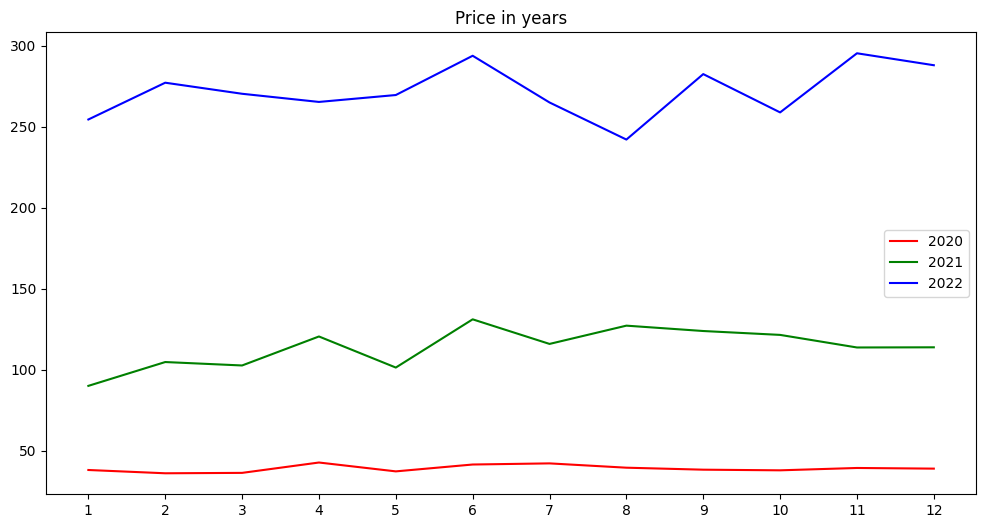

In [ ]:
colors=['r','g','b']
price_values=[data_month.loc[:11]['Prices'],data_month.loc[12:23]['Prices'],data_month.loc[24:35]['Prices']]
labels = ['2020', '2021', '2022']
plt.figure(figsize=(12,6))

for i in range(3):
    x_values = list(range(1, 13))
    plt.plot(x_values, price_values[i], c=colors[i], label=labels[i])
plt.xticks(range(1,13))
plt.title('Price in years')
plt.legend()

### Install pmdarima

In [ ]:
!pip install pmdarima

In [ ]:
df.set_index('Delivery Day',inplace=True)

In [ ]:
df['year']=df.index.year


In [ ]:

df.head()

,Hours,Prices,year
Delivery Day,,,
2020-01-01,H1,26.38,2020
2020-01-01,H2,26.50,2020
2020-01-01,H3,27.01,2020
2020-01-01,H4,27.40,2020
2020-01-01,H5,27.99,2020


In [ ]:
df.drop(['Hours'],axis=1,inplace=True)

In [ ]:
df_mean=df.groupby(['year'])['Prices'].mean().reset_index()

In [ ]:


df_mean

,year,Prices
0,2020,39.005663
1,2021,113.842571
2,2022,271.662158
3,2023,107.082776


In [ ]:
df_std=df.groupby(['year'])['Prices'].std().reset_index()

In [ ]:
df_std

,year,Prices
0,2020,17.578831
1,2021,79.954229
2,2022,139.850045
3,2023,47.695959


In [ ]:


value_2020_1=df_mean['Prices'][0]-df_std['Prices'][0]
value_2020_2=df_mean['Prices'][0]+df_std['Prices'][0]
value_2021_1=df_mean['Prices'][1]-df_std['Prices'][1]
value_2021_2=df_mean['Prices'][1]+df_std['Prices'][1]
value_2022_1=df_mean['Prices'][2]-df_std['Prices'][2]
value_2022_2=df_mean['Prices'][2]+df_std['Prices'][2]
value_2023_1=df_mean['Prices'][3]-df_std['Prices'][3]
value_2023_2=df_mean['Prices'][3]+df_std['Prices'][3]


In [ ]:
df_2020=df[df['year']==2020]
df_2020.head()

,Prices,year
Delivery Day,,
2020-01-01,26.38,2020
2020-01-01,26.50,2020
2020-01-01,27.01,2020
2020-01-01,27.40,2020
2020-01-01,27.99,2020


In [ ]:
df_1=df_2020[(df_2020['Prices']>value_2020_1) & (df_2020['Prices']<value_2020_2)]

In [ ]:
df_2021=df[df['year']==2021]
df_2=df_2021[(df_2021['Prices']>value_2021_1) & (df_2021['Prices']<value_2021_2)]

In [ ]:
df_2022=df[df['year']==2022]
df_3=df_2022[(df_2022['Prices']>value_2022_1) & (df_2022['Prices']<value_2022_2)]

In [ ]:
df_2023=df[df['year']==2023]
df_4=df_2023[(df_2023['Prices']>value_2023_1) & (df_2023['Prices']<value_2023_2)]

In [ ]:
df_1.drop('year',axis=1,inplace=True)
df_2.drop('year',axis=1,inplace=True)
df_3.drop('year',axis=1,inplace=True)
df_4.drop('year',axis=1,inplace=True)

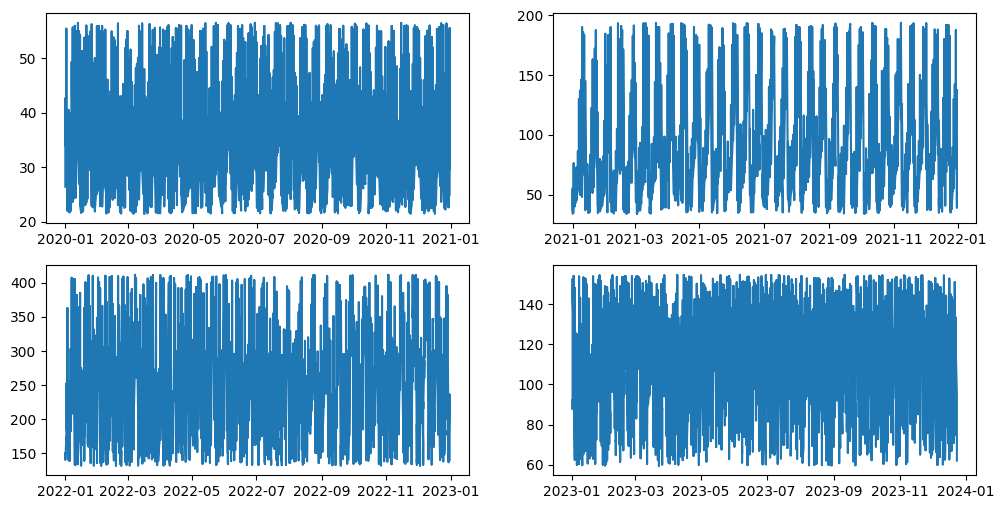

In [ ]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,6))
ax1.plot(df_1.index,df_1.Prices)
ax2.plot(df_2.index,df_2.Prices)
ax3.plot(df_3.index,df_3.Prices)
ax4.plot(df_4.index,df_4.Prices)

In [ ]:

result_df = pd.concat([df_1, df_2, df_3,df_4], axis=0, ignore_index=False)

In [ ]:
result_df.head


<bound method NDFrame.head of               Prices
Delivery Day        
2020-01-01     26.38
2020-01-01     26.50
2020-01-01     27.01
2020-01-01     27.40
2020-01-01     27.99
...              ...
2023-12-24     94.67
2023-12-24     79.61
2023-12-24     79.99
2023-12-24     71.09
2023-12-24     62.01

[26490 rows x 1 columns]>

### Stationarity Check

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. p-value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num of Observations used for ADF regression and Critical Values Calculation: ", dftest[3])
  print("5. Critical Values: ")

  for key, val in dftest[4].items():
    print("\t", key, ": ", val)

In [ ]:
ad_test(df_1)
ad_test(df_2)
ad_test(df_3)
ad_test(df_4)

1. ADF:  -11.514398506344879
2. p-value:  4.184156861467114e-21
3. Num of Lags:  24
4. Num of Observations used for ADF regression and Critical Values Calculation:  6624
5. Critical Values: 
	 1% :  -3.4313375960037282
	 5% :  -2.8619764341943488
	 10% :  -2.567002310396137
1. ADF:  -9.710561211796016
2. p-value:  1.014250366691329e-16
3. Num of Lags:  34
4. Num of Observations used for ADF regression and Critical Values Calculation:  7034
5. Critical Values: 
	 1% :  -3.4312800096693654
	 5% :  -2.861950989869595
	 10% :  -2.5669887659007724
1. ADF:  -13.327099952091597
2. p-value:  6.289609374013368e-25
3. Num of Lags:  27
4. Num of Observations used for ADF regression and Critical Values Calculation:  6334
5. Critical Values: 
	 1% :  -3.431382831089674
	 5% :  -2.861996420816857
	 10% :  -2.567012949712604
1. ADF:  -12.456689843977847
2. p-value:  3.4782329414277956e-23
3. Num of Lags:  22
4. Num of Observations used for ADF regression and Critical Values Calculation:  6387
5. Crit

### Figuring out Order for the ARIMA model

In [ ]:

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def fit(dataset):
  stepwise_fit = auto_arima(dataset['Prices'], start_p=1, start_q=1,
                        test='adf',       # use adftest to find optimal 'd'
                        max_p=3, max_q=3, # maximum p and q
                        m=1,              # frequency of series
                        d=None,           # let model determine 'd'
                        seasonal=True,   # No Seasonality
                        start_P=0,
                        D=0,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)
  stepwise_fit.summary()

In [ ]:
fit(df_1)
fit(df_2)
fit(df_3)
fit(df_4)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=38835.842, Time=2.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48179.114, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39647.273, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=42614.562, Time=2.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67507.291, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=38573.998, Time=3.78 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=38582.719, Time=1.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=38560.161, Time=9.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=38569.369, Time=1.90 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=38523.201, Time=12.30 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=38530.548, Time=7.24 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=38498.126, Time=19.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=38513.587, Time=16.82 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=38749.152, Time=8.24 sec

Best model:  AR

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
def train_size(dataset):
  count = dataset['Prices'].count()
  split_train = 0.7 * count
  print(split_train)

In [ ]:
train_size(df_1)
train_size(df_2)
train_size(df_3)
train_size(df_4)

4654.299999999999
4948.299999999999
4453.4
4487.0


In [ ]:

train_1 = df_1.iloc[:4654]
test_1= df_1.iloc[4654:]
train_2 = df_2.iloc[:4950]
test_2= df_2.iloc[4950:]
train_3 = df_3.iloc[:4453]
test_3= df_3.iloc[4453:]
train_4 = df_4.iloc[:4488]
test_4= df_4.iloc[4488:]


### Train the model

In [ ]:

def train(data,p,d,q):
  model = ARIMA(data, order=(p, d, q))
  model = model.fit()
  return model

In [ ]:

models_1=(train(train_1,3,0,3))
models_2=(train(train_2,2,0,3))
models_3=(train(train_3,3,0,0))
models_4=(train(train_4,3,0,0))


### Make predictions in the test test

In [ ]:

def predict(model,train_,test_):
  start = len(train_)
  end = len(train_) + len(test_) - 1
  prediction  = model.predict(start=start, end=end)
  return prediction

In [ ]:
output_1=predict(models_1,train_1,test_1)
output_2=predict(models_2,train_2,test_2)

output_3=predict(models_3,train_3,test_3)
output_4=predict(models_4,train_4,test_4)

In [ ]:
output_1.head

<bound method NDFrame.head of 4654    31.166135
4655    32.973272
4656    34.742336
4657    35.984180
4658    36.616378
          ...    
6644    37.605195
6645    37.605195
6646    37.605195
6647    37.605195
6648    37.605195
Name: predicted_mean, Length: 1995, dtype: float64>

In [ ]:
prediction_1 = pd.DataFrame({'Predicted_Values': output_1.values}, index=output_1.index)

In [ ]:
prediction_2 = pd.DataFrame({'Predicted_Values': output_2.values}, index=output_2.index)
prediction_3 = pd.DataFrame({'Predicted_Values': output_3.values}, index=output_3.index)
prediction_4 = pd.DataFrame({'Predicted_Values': output_4.values}, index=output_4.index)


In [ ]:
prediction_1.index=test_1.index

In [ ]:
prediction_1.head()

,Predicted_Values
Delivery Day,
2020-09-12,31.166135
2020-09-12,32.973272
2020-09-12,34.742336
2020-09-12,35.984180
2020-09-12,36.616378


In [ ]:
prediction_2.index=test_2.index
prediction_3.index=test_3.index
prediction_4.index=test_4.index

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def calc_rmse(prediction,test):
  rmse = sqrt(mean_squared_error(prediction, test))
  print(rmse)

In [ ]:
calc_rmse(prediction_1,test_1)
calc_rmse(prediction_2,test_2)
calc_rmse(prediction_3,test_3)
calc_rmse(prediction_4,test_4)

9.18959237833711
40.54197471883857
71.15716933499317
23.022907488854113


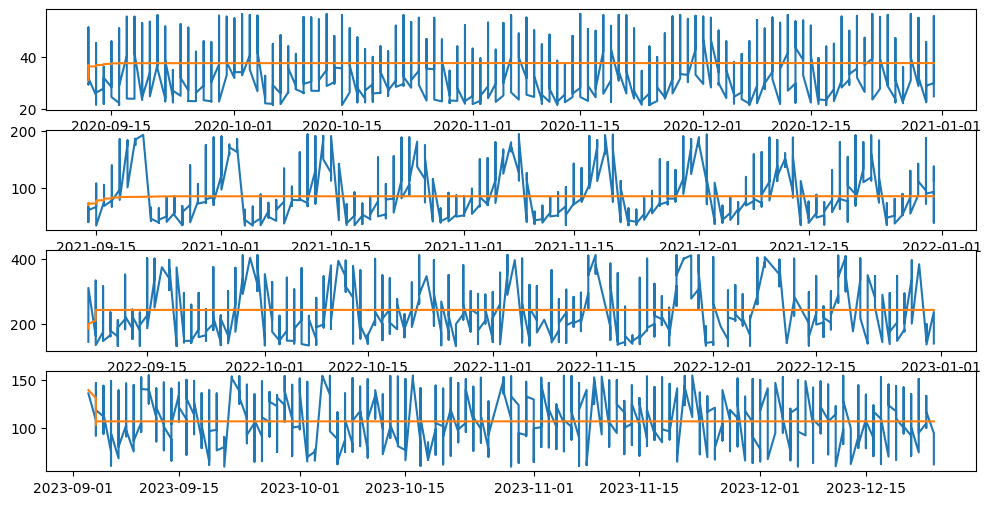

In [ ]:
fig,ax=plt.subplots(4,1,figsize=(12,6))
ax[0].plot(test_1)
ax[0].plot(prediction_1)
ax[1].plot(test_2)
ax[1].plot(prediction_2)
ax[2].plot(test_3)
ax[2].plot(prediction_3)
ax[3].plot(test_4)
ax[3].plot(prediction_4)

In [ ]:
prediction_4

,Predicted_Values
Delivery Day,
2023-09-03,139.473827
2023-09-04,131.158854
2023-09-04,120.551954
2023-09-04,111.960741
2023-09-04,106.466351
...,...
2023-12-24,106.838847
2023-12-24,106.838847
2023-12-24,106.838847


In [ ]:
prediction_4=prediction_4.tail(168)

In [ ]:
prediction_4.to_csv("price_outputs.csv")